## Importing Libraries

In [1]:
using Plots
using CSV
using LinearAlgebra

## Importing Dataset

In [2]:
data_set = CSV.File("Books Dataset.csv")

20-element CSV.File{false}:
 CSV.Row: (Name = "Harry Potter and the Philospher's Stone", Rating = 4.48, Genre = "Fantasy", Movie Made = "Yes", Liked = "No")
 CSV.Row: (Name = "The Hobbit", Rating = 4.25, Genre = "Fantasy", Movie Made = "Yes", Liked = "Yes")
 CSV.Row: (Name = "Red Sparrow", Rating = 3.95, Genre = "Thriller", Movie Made = "Yes", Liked = "Yes")
 CSV.Row: (Name = "Pines", Rating = 3.93, Genre = "Thriller", Movie Made = "No", Liked = "Yes")
 CSV.Row: (Name = "The Kill Artist", Rating = 4.0, Genre = "Thriller", Movie Made = "No", Liked = "Yes")
 CSV.Row: (Name = "Silver Girl", Rating = 3.91, Genre = "Romance", Movie Made = "No", Liked = "Yes")
 CSV.Row: (Name = "Rock Chick Revenge", Rating = 4.48, Genre = "Romance", Movie Made = "No", Liked = "no")
 CSV.Row: (Name = "Naked in Death", Rating = 4.14, Genre = "Thriller", Movie Made = "No", Liked = "No")
 CSV.Row: (Name = "Fifty Shades of Grey", Rating = 3.85, Genre = "Romance", Movie Made = "Yes", Liked = "Yes")
 CSV.Row: (Name

In [3]:
X = []
Y = []

for row in data_set
    push!(X, [1, row[2], row[3], row[4]])
    push!(Y, row[5])
end

n = length(X)
d = length(first(X))

4

## Pre-Processing Dataset

In [4]:
for x in X
    if lowercase(x[3]) == "fantasy"
        x[3] = 1
    elseif lowercase(x[3]) == "horror"
        x[3] = 2
    elseif lowercase(x[3]) == "thriller"
        x[3] = 3
    elseif lowercase(x[3]) == "romance"
        x[3] = 4
    elseif lowercase(x[3]) == "biography"
        x[3] = 5
    end
    
    if lowercase(x[4]) == "yes"
        x[4] = 1
    else
        x[4] = 0
    end
end

for i in 1:n
    if lowercase(Y[i]) == "yes"
        Y[i] = 1
    else
        Y[i] = 0
    end
end
    
println(Y)

Any[0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0]


In [5]:
class_0 = []
class_1 = []

for i in 1:n
    if Y[i] == 0
        push!(class_0, X[i])
    else
        push!(class_1, X[i])
    end
end

## Plotting Distribution


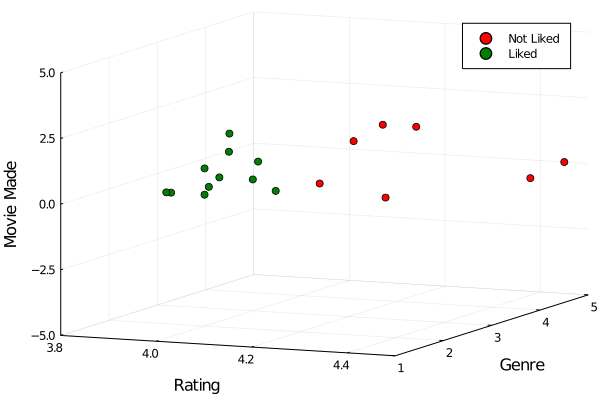

In [6]:
scatter([x[2] for x in class_0], [x[3] for x in class_0], [x[4] for x in class_0], label="Not Liked", c=:red, xlabel="Rating", ylabel="Genre", zlabel="Movie Made", zlim=(-5,5), xlim=(3.8,4.5), ylim=(1,5))
scatter!([x[2] for x in class_1], [x[3] for x in class_1], [x[4] for x in class_1], label="Liked", c=:green)

## Perceptron Learning Algorithm

In [7]:
# Initialize Random w

w = zeros(d)

converged = false

while !converged
    
    converged = true
    
    for x in class_0
        if dot(w, x) >= 0
            w -= x
            converged = false
        end
    end
    
    if converged == true
        for x in class_1
            if dot(w, x) < 0
                w += x
                converged = false
            end
        end
    end
    
end

println(w)

[118.0, -27.86000000000091, -2.0, 4.0]


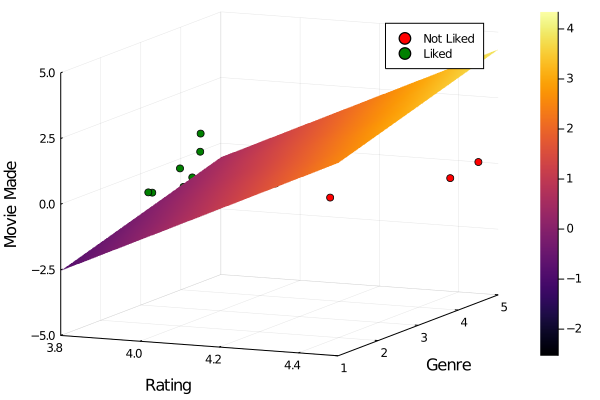

In [10]:
scatter([x[2] for x in class_0], [x[3] for x in class_0], [x[4] for x in class_0], label="Not Liked", c=:red, xlabel="Rating", ylabel="Genre", zlabel="Movie Made", zlim=(-5,5), xlim=(3.8,4.5), ylim=(1,5))
scatter!([x[2] for x in class_1], [x[3] for x in class_1], [x[4] for x in class_1], label="Liked", c=:green)

x = range(3.8, stop=4.5, length=10)
y = range(1, stop=5, length=10)
f(x, y) = -1*(w[2]*x + w[3]*y + w[1]) / w[4]

# plot!(x, y, f, st=:surface, label=:none)
surface!(x,y,f, fillalpha=0.5)